## **二维稳态热传导方程（无时间变化）**
$$
\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=0
$$
- $u(x,y)$：表示二维平面上点 $(x,y)$ 的温度

- 该方程也被称为 **拉普拉斯方程（Laplace Equation）**，适用于稳态（steady-state）问题

- 对应的边界条件我们可以自定义，例如左热右冷、上下绝热等

### 🧩 实战目标
| 项目 | 内容 |
|----------|----------|
|📐 几何区域 | 单位方形区域 $[0,1]\times[0,1]$| 
|🔧 PDE	| $\nabla^2u=0_{稳态}$ 或 $\frac{\partial u}{\partial t}=\alpha(\nabla^2u)_{非稳态}$ |
|🧱 PINNs框架 | 使用 DeepXDE 搭建 |
|📊 可视化 | 热图 + 动画 + 动态截面线 |
|💡 延伸目标 | 换不同的边界条件，尝试稳态/非稳态对比 |

### ✅ 下一步计划（推荐路线）
▶️ **路线 1：先做稳态 2D 导热（Laplace 方程）**
  - 不涉及时间维度，模型更简单

  - 易于训练和可视化，重点放在空间结构建模和二维预测上

🔁 **路线 2：再拓展到非稳态 2D 导热（Heat 方程）**
  - 增加时间维度 $t$，处理 $u(x,y,t)$

  - 更具挑战性但更贴近真实物理系统

### 📐 **问题设定**
在单位正方形区域 $[0,1]\times[0,1]$ 中，我们要求解：
$$
\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=0
$$
其中：
  - $u(x,y)$：表示该区域中点 $(x,y)$ 的稳态温度分布

  - 这是一个典型的 拉普拉斯方程

### 🎯 **边界条件说明**
| 边界 | 条件 | 说明 |
|:----- | :----- | :----- |
| 左边界 $(x=0)$ | $u(0,y)=1$ | 恒定高温（加热）|
| 右边界 $(x=1)$ | $u(1,y)=0$ | 恒定低温（冷却）|
|上下边界 $(y=0,1) | $\frac{\partial u}{\partial y}=0$ |	绝热边界，不交换热量 |

### 🛠️ **实战任务一：建立 2D Laplace 模型**
我们将使用 DeepXDE 完成以下步骤：

1. ✅ 定义几何区域

2. ✅ 编写 PDE 方程（使用自动微分）

3. ✅ 添加边界条件（Dirichlet + Neumann）

4. ✅ 搭建神经网络

5. ✅ 训练并可视化温度分布

Compiling model...
'compile' took 0.000776 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [3.23e-03, 1.06e+00, 1.15e-02, 2.08e-03, 2.68e-03]    [3.23e-03, 1.06e+00, 1.15e-02, 2.08e-03, 2.68e-03]    []  
1000      [2.79e-04, 2.30e-04, 8.29e-04, 1.32e-02, 1.81e-04]    [2.79e-04, 2.30e-04, 8.29e-04, 1.32e-02, 1.81e-04]    []  
2000      [1.11e-03, 1.50e-03, 1.53e-03, 1.04e-02, 1.23e-03]    [1.11e-03, 1.50e-03, 1.53e-03, 1.04e-02, 1.23e-03]    []  
3000      [5.83e-04, 4.66e-05, 2.03e-03, 4.98e-03, 1.90e-05]    [5.83e-04, 4.66e-05, 2.03e-03, 4.98e-03, 1.90e-05]    []  
4000      [8.81e-04, 1.70e-05, 1.28e-03, 2.22e-03, 6.02e-05]    [8.81e-04, 1.70e-05, 1.28e-03, 2.22e-03, 6.02e-05]    []  
5000      [3.83e-04, 4.98e-06, 9.83e-04, 1.30e-03, 5.55e-06]    [3.83e-04, 4.98e-06, 9.83e-04, 1.30e-03, 5.55e-06]    []  

Best model at step 5000:
  train loss: 2.68e-03
  test loss: 2.68e

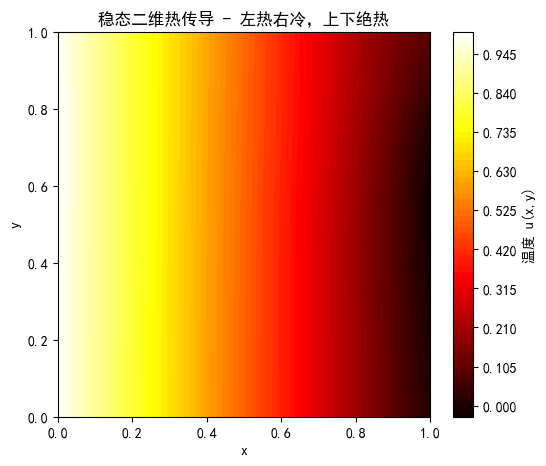

In [3]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'  # 使用黑体（SimHei）支持中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题

# 1. 定义二维空间区域 [0, 1] x [0, 1]
geom = dde.geometry.Rectangle(xmin=[0, 0], xmax=[1, 1])

# 2. 定义 PDE（Laplace 方程）：Δu = ∂²u/∂x² + ∂²u/∂y² = 0
def laplace_pde(x, u):
    du_xx = dde.grad.hessian(u, x, i=0, j=0)  # ∂²u/∂x²
    du_yy = dde.grad.hessian(u, x, i=1, j=1)  # ∂²u/∂y²
    return du_xx + du_yy

# 3. 边界条件
# 左边界 x = 0，u = 1（加热）
def boundary_left(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0)
bc_left = dde.DirichletBC(geom, lambda x: 1, boundary_left)

# 右边界 x = 1，u = 0（冷却）
def boundary_right(x, on_boundary):
    return on_boundary and np.isclose(x[0], 1)
bc_right = dde.DirichletBC(geom, lambda x: 0, boundary_right)

# 上边界 y = 1，∂u/∂y = 0（绝热）
def boundary_top(x, on_boundary):
    return on_boundary and np.isclose(x[1], 1)
bc_top = dde.NeumannBC(geom, lambda x: 0, boundary_top)

# 下边界 y = 0，∂u/∂y = 0（绝热）
def boundary_bottom(x, on_boundary):
    return on_boundary and np.isclose(x[1], 0)
bc_bottom = dde.NeumannBC(geom, lambda x: 0, boundary_bottom)

# 4. 定义模型
data = dde.data.PDE(
    geom,
    laplace_pde,
    [bc_left, bc_right, bc_top, bc_bottom],
    num_domain=4000,
    num_boundary=100,
)

net = dde.maps.FNN([2] + [50]*3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)

# 5. 训练模型
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(epochs=5000)

# 6. 可视化预测结果
# 构造网格 (x, y) 用于预测
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
XY = np.vstack((X.flatten(), Y.flatten())).T
u_pred = model.predict(XY).reshape(100, 100)

# 绘图
plt.figure(figsize=(6, 5))
cp = plt.contourf(X, Y, u_pred, levels=100, cmap="hot")
plt.colorbar(cp, label="温度 u(x,y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("稳态二维热传导 - 左热右冷，上下绝热")
plt.show()


### 🎞️ 动画目标：
- $x \in [0, 1]$ 表示水平方向

- 每帧展示某个固定 y 截面上 u(x, y) 的温度分布

- 从 y=0 到 y=1，观察热量如何沿 x 方向扩散

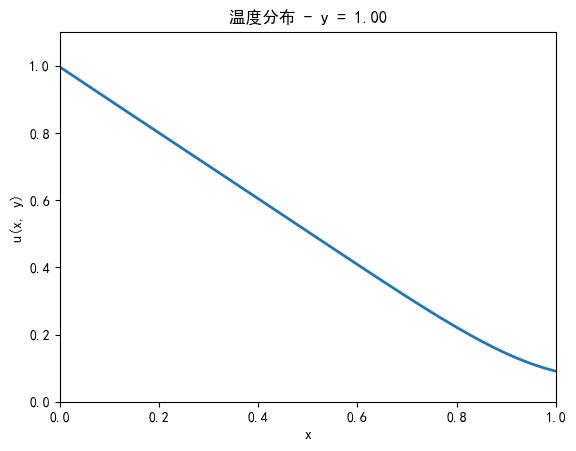

In [4]:
import matplotlib.animation as animation
from IPython.display import HTML

# 重新使用已有模型预测的 u_pred（shape: 100 x 100）

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.1)
ax.set_xlabel("x")
ax.set_ylabel("u(x, y)")
ax.set_title("不同 y 截面的温度分布")

# 初始化函数：清空画布
def init():
    line.set_data([], [])
    return line,

# 更新函数：每一帧显示 u(x, y_i)
def update(frame):
    y_index = frame
    u_slice = u_pred[y_index, :]  # 固定 y，提取一行数据
    line.set_data(x, u_slice)
    ax.set_title(f"温度分布 - y = {y[y_index]:.2f}")
    return line,

# 创建动画对象
ani = animation.FuncAnimation(
    fig, update, frames=len(y), init_func=init, blit=True, interval=100
)

# 在 JupyterLab 中播放动画
HTML(ani.to_jshtml())


### ✅ 保存动画为 heat_2d_sweep.mp4

In [5]:
# 🔁 使用之前的 ani 对象保存为 MP4
from matplotlib.animation import FFMpegWriter

writer = FFMpegWriter(fps=10, metadata=dict(artist='PINNs Learner'), bitrate=1800)
ani.save("heat_2d_sweep.mp4", writer=writer)

print("✅ 动画已保存为 heat_2d_sweep.mp4")


✅ 动画已保存为 heat_2d_sweep.mp4


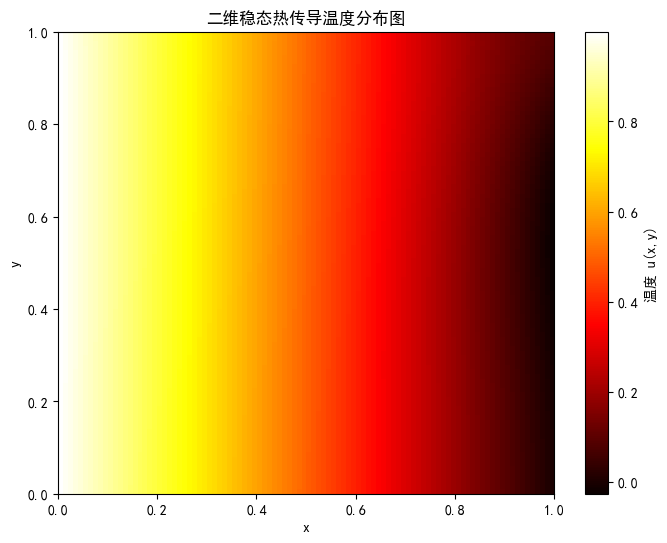

In [6]:
import matplotlib.pyplot as plt

# 创建图像窗口
plt.figure(figsize=(8, 6))

# 使用 imshow 显示热图
plt.imshow(
    u_pred,                  # 图像数据（100 x 100）
    extent=[0, 1, 0, 1],     # x 和 y 范围
    origin='lower',          # y=0 在下方
    aspect='auto',           # 自动缩放
    cmap='hot'               # 热力颜色（红黄为热）
)

plt.colorbar(label="温度 u(x,y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("二维稳态热传导温度分布图")
plt.grid(False)
plt.show()


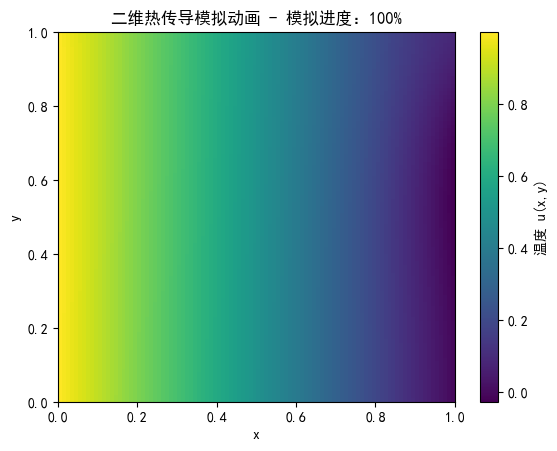

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# 🔧 准备数据
frames = 60  # 帧数（越大越平滑）
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# 稳态预测结果 u_pred (shape: 100x100)
# 我们模拟 u=0 演化到 u_pred
U_start = np.zeros_like(u_pred)  # 初始为 0
U_final = u_pred

# 创建画布
fig, ax = plt.subplots()
cax = ax.imshow(U_start, extent=[0, 1, 0, 1], origin='lower',
                aspect='auto', cmap='viridis', vmin=U_final.min(), vmax=U_final.max())
                # cmap='inferno'    # 高对比，暗红色系  
                # cmap='coolwarm'   # 蓝-红渐变  
                # cmap='viridis'    # 视觉友好型绿蓝色调  
fig.colorbar(cax, label="温度 u(x,y)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("二维热传导模拟动画")

# 初始化函数
def init():
    cax.set_data(U_start)
    return [cax]

# 每一帧过渡一部分
def update(frame):
    alpha = frame / (frames - 1)  # 从 0 → 1
    U_interp = (1 - alpha) * U_start + alpha * U_final
    cax.set_data(U_interp)
    ax.set_title(f"二维热传导模拟动画 - 模拟进度：{int(alpha*100)}%")
    return [cax]

# 创建动画
ani = animation.FuncAnimation(fig, update, frames=frames, init_func=init,
                              blit=True, interval=100)

# 在 Jupyter 中展示
HTML(ani.to_jshtml())
